In [1]:
#importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

D:\Program_Files\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Program_Files\Anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\Program_Files\Anaconda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#reading the dataset
df = pd.read_csv('../Data Collection/loan_prediction.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Filling the Null Values with Mode and Median

In [5]:
df["Gender"].fillna(df['Gender'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)
df["Married"].fillna(df['Married'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)

In [6]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
df.shape

(614, 13)

### Outlier detection and replacement with median

D:\Program_Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

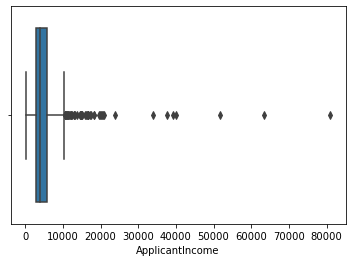

In [9]:
sns.boxplot(df.ApplicantIncome)

In [10]:
Q1 = df.ApplicantIncome.quantile(0.25)
Q2 = df.ApplicantIncome.quantile(0.75)

In [11]:
IQR = Q2-Q1
IQR

2917.5

In [12]:
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [13]:
upper_limit

10171.25

In [14]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome']>upper_limit,df['ApplicantIncome'].median(),df['ApplicantIncome'])

D:\Program_Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

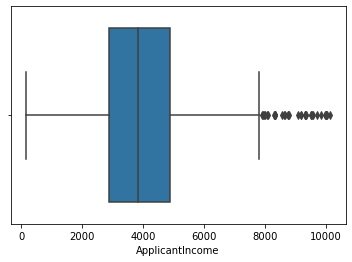

In [15]:
sns.boxplot(df.ApplicantIncome)

D:\Program_Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

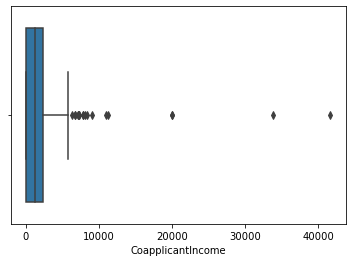

In [16]:
sns.boxplot(df.CoapplicantIncome)

In [17]:
Q1 = df.CoapplicantIncome.quantile(0.25)
Q2 = df.CoapplicantIncome.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit=',upper_limit)
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome']>upper_limit,df['CoapplicantIncome'].median(),df['CoapplicantIncome'])

2297.25
upper_limit= 5743.125


D:\Program_Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

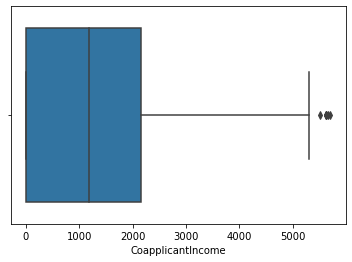

In [18]:
sns.boxplot(df.CoapplicantIncome)

In [19]:
df.shape

(614, 13)

D:\Program_Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

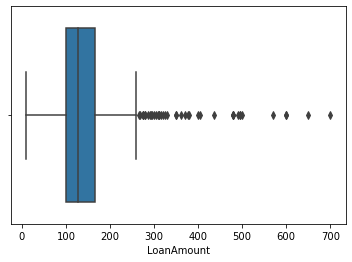

In [20]:
sns.boxplot(df.LoanAmount)

In [21]:
Q1 = df.LoanAmount.quantile(0.25)
Q2 = df.LoanAmount.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit=',upper_limit)
df['LoanAmount'] = np.where(df['LoanAmount']>upper_limit,df['LoanAmount'].median(),df['LoanAmount'])

64.5
upper_limit= 261.5


D:\Program_Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

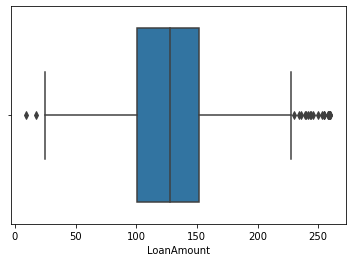

In [22]:
sns.boxplot(df.LoanAmount)

In [23]:
Q1 = df.Loan_Amount_Term.quantile(0.25)
Q2 = df.Loan_Amount_Term.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit=',upper_limit)
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term']>upper_limit,df['Loan_Amount_Term'].median(),df['Loan_Amount_Term'])

0.0
upper_limit= 360.0


In [24]:
df.shape

(614, 13)

### Label Encoding

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
import pickle

In [28]:
df.Gender = le.fit_transform(df.Gender)
output = open('Gender_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

df.Married = le.fit_transform(df.Married)
output = open('Married_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

df.Education = le.fit_transform(df.Education)
output = open('Education_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

df.Self_Employed = le.fit_transform(df.Self_Employed)
output = open('Self_Employed_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

df.Property_Area = le.fit_transform(df.Property_Area)
output = open('Property_Area_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

df.Loan_Status = le.fit_transform(df.Loan_Status)
output = open('Loan Status_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

In [29]:
df = df.drop(columns=['Loan_ID'], axis=1)

#### Handling dependents values

In [30]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [31]:
df = df.replace('3+', 3,)

In [32]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106.0,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


### Get the features and target

In [33]:
X = df.drop(columns=['Loan_Status'], axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2


In [34]:
y = df.Loan_Status
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

### Scaling

In [35]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X = pd.DataFrame(scale.fit_transform(X), columns = X.columns)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.570528,0.000000,0.474104,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.443788,0.264515,0.474104,1.0,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.285314,0.000000,0.227092,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.243568,0.413612,0.442231,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.585644,0.000000,0.525896,1.0,1.0,1.0


In [36]:
scalerfile = 'scaler.sav'
pickle.dump(scale, open(scalerfile, 'wb'))

### Test Train split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
351,1.0,0.0,0.000000,0.0,0.0,0.860947,0.730924,0.474104,1.000000,1.0,0.0
593,1.0,1.0,0.000000,0.0,0.0,0.371308,0.578846,0.529880,0.482759,1.0,0.0
320,1.0,1.0,0.000000,0.0,0.0,0.225248,0.380109,0.422311,1.000000,1.0,0.5
186,1.0,1.0,0.333333,0.0,1.0,0.203023,0.000000,0.227092,0.827586,0.0,0.0
557,1.0,1.0,1.000000,0.0,1.0,1.000000,0.000000,1.000000,1.000000,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
277,1.0,1.0,0.000000,0.0,0.0,0.295625,0.228030,0.282869,1.000000,1.0,1.0
9,1.0,1.0,0.333333,0.0,0.0,0.366653,0.208472,0.474104,1.000000,1.0,0.5
359,1.0,1.0,1.000000,0.0,0.0,0.502252,0.555517,0.760956,1.000000,1.0,0.5
192,1.0,1.0,0.000000,1.0,0.0,0.588948,0.000000,0.601594,1.000000,1.0,1.0


In [39]:
X_train.shape

(429, 11)

In [40]:
X_test.shape

(185, 11)

In [41]:
y_train.shape

(429,)

In [42]:
y_test.shape

(185,)

#### Save the pre-processed dataset

In [43]:
df.to_csv("preprocessed_smartlender_dataset.csv", encoding='utf-8', index=False)

# Model Building

### KNN Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [45]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred = model.predict(X_test)
y_pred

D:\Program_Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1])

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
print('Testing accuracy: ',accuracy_score(y_test, y_pred))

Testing accuracy:  0.8216216216216217


### Decision Tree Model

In [49]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [50]:
y_pred = dtree.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
print('Testing accuracy: ',accuracy_score(y_test, y_pred))

Testing accuracy:  0.7351351351351352


### Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [53]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1])

In [55]:
print('Testing accuracy: ',accuracy_score(y_test, y_pred))

Testing accuracy:  0.7945945945945946


### Support Vector Classifier

In [96]:
from sklearn.svm import SVC
model = SVC()

In [97]:
model.fit(X_train,y_train)

SVC()

In [100]:
model.best_params_


AttributeError: 'SVC' object has no attribute 'best_params_'

In [98]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [99]:
print('Testing accuracy: ', accuracy_score(y_test, y_pred))

Testing accuracy:  0.827027027027027


### XGBoost Model

In [60]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier()

In [61]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
print('Testing accuracy: ', accuracy_score(y_test, y_pred))

Testing accuracy:  0.7567567567567568


### Comparision of Models

In [64]:
models = [
    ('KNN model', KNeighborsClassifier()), 
    ('Decision Tree model', DecisionTreeClassifier()), 
    ('Random Forest model', RandomForestClassifier()),
    ('XG Boost model', XGBClassifier()),
    ('Support Vector Classifier', SVC()),
]

In [65]:
names = []
scores = []
fitted_models = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['0', '1']

In [66]:
from sklearn import model_selection

for name, model in models:
    kfold = model_selection.KFold(
        n_splits=5, 
        shuffle=True, 
        random_state=90210
    )
        
    cv_results = model_selection.cross_validate(
        model, X_train, y_train, 
        cv=kfold, 
        scoring=scoring
    )
        
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    fitted_models.append(model)
    
    names.append(name)
    print(name)
    
    sc = accuracy_score(y_pred, y_test)
    print("Accuracy Score : ", sc)
    scores.append(sc)
    
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("----------------------------------------------------------------")

D:\Program_Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Program_Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

KNN model
Accuracy Score :  0.8216216216216217
              precision    recall  f1-score   support

           0       0.78      0.49      0.60        51
           1       0.83      0.95      0.89       134

    accuracy                           0.82       185
   macro avg       0.81      0.72      0.74       185
weighted avg       0.82      0.82      0.81       185

----------------------------------------------------------------
Decision Tree model
Accuracy Score :  0.7189189189189189
              precision    recall  f1-score   support

           0       0.49      0.57      0.53        51
           1       0.83      0.78      0.80       134

    accuracy                           0.72       185
   macro avg       0.66      0.67      0.66       185
weighted avg       0.73      0.72      0.72       185

----------------------------------------------------------------
Random Forest model
Accuracy Score :  0.7837837837837838
              precision    recall  f1-score   support



In [67]:
Models = pd.DataFrame({
    'n_neighbors': names,
    'score': scores})

Models.sort_values(by = 'score', ascending = False)

,n_neighbors,score
4,Support Vector Classifier,0.827027
0,KNN model,0.821622
2,Random Forest model,0.783784
3,XG Boost model,0.756757
1,Decision Tree model,0.718919


### Store the top model for using it for the application

In [68]:
best_model = Models.sort_values(by = 'score', ascending = False).head(1)
best_model

,n_neighbors,score
4,Support Vector Classifier,0.827027


In [69]:
selected_model_index = best_model.index.tolist()[0]
selected_model_index

4

In [70]:
selected_model = fitted_models[selected_model_index]
selected_model

SVC()

In [71]:
y_pred = selected_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.827027027027027


In [77]:
from sklearn.metrics import confusion_matrix

df_cm = confusion_matrix(y_test, y_pred)

[Text(33.0, 0.5, 'Actual Label'), Text(0.5, 15.0, 'Predicted Label')]

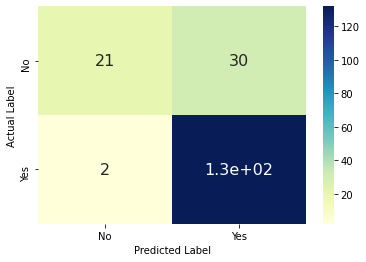

In [90]:
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=['No', 'Yes'], index = ['No', 'Yes'])

ax = sn.heatmap(df_cm, annot=True, cmap="YlGnBu", annot_kws={"size": 16})
ax.set(ylabel="Actual Label", xlabel="Predicted Label")

In [115]:
svm_params={
    'C':[1],
    'kernel':['rbf'],
    'gamma' : ['scale']
}

svc = SVC()

In [117]:
from sklearn.model_selection import RandomizedSearchCV

svm_tun = RandomizedSearchCV(svc, svm_params, scoring='roc_auc', cv=5)
svm_tun.fit(X_train, y_train)

print(svm_tun.best_params_)

{'kernel': 'rbf', 'gamma': 'scale', 'C': 1}


D:\Program_Files\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [118]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [104]:
model.accuracy_score()

AttributeError: 'SVC' object has no attribute 'accuracy_score'

In [73]:
import pickle

In [74]:
model_name = "Smart_Lenders_{}.pkl".format(names[selected_model_index])
print(model_name)

pickle.dump(model, open(model_name,'wb'))
print("model saved")

Smart_Lenders_Support Vector Classifier.pkl
model saved
